<a href="https://colab.research.google.com/github/Manojpatil123/Capstone-project-Supervised_machinelearning-on-Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

### Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

#GOAL of the project
Today's word usage of energy is increasing rapidly. Due to more usage of energy in some parts of the world, we are facing a lack of energy and it leads to environmental pollution. In some of the places, we are facing outrageous energy consumption in home appliances, so our main goal in this project is to analyse what the factors are affecting the increasing energy consumption of home appliances, how we can reduce the energy consumption of home appliances, and predict energy consumption of appliances by using regression models.

# Tabel of content 


* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Feature selection__
   
* __Step 5: Feature engineering__
   
* __Step 6: Train and Test split__
   
* __Step 7: Model training__
   
* __Step 8: Cross validation__

* __Step 9: Model explainability__

* __Step 10: Conclusion__


In [1]:
#installing package
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.2 MB/s 


# Importing the Relevant Libraries

In [49]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

Loding dataset to pandas dataframe

In [3]:
#importing dataset
path='/content/drive/MyDrive/Alma better/Alma better/capstone project/supervised learning (regression)/data_application_energy.csv'
df=pd.read_csv(path)

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Checking shape of dataset
 Here 1st value counts number of data points and second value represents the number of features in the dataset



In [5]:
#checking shape of the dataset
df.shape

(19735, 29)

in our dataset 29 columns and 19735 rows are present

## Data set information

date time year-month-day hour:minute:second 

Appliances, energy use in Wh (Dependent variable) 

lights, energy use of light fixtures in the house in Wh (Drop this column) 

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % 

T2, Temperature in living room area, in Celsius 

RH2, Humidity in living room area, in % 

T3, Temperature in laundry room area 

RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius

RH4, Humidity in office room, in % 

T5, Temperature in bathroom, in Celsius 

RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius 

RH6, Humidity outside the building (north side), in % 

T7, Temperature in ironing room , in Celsius 

RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius 

RH8, Humidity in teenager room 2, in % 

T9, Temperature in parents room, in Celsius 

RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in Celsius 

Pressure (from Chievres weather station), in mm Hg 

RHout, Humidity outside (from Chievres weather station), in % 

Wind speed (from Chievres weather station), in m/s 

Visibility (from Chievres weather station), in km 

Tdewpoint (from Chievres weather station), Â°C 

rv1, Random variable 1, nondimensional 

 rv2, Random variable 2, nondimensional



# Data Inspection

### Checking all the data types of our dataset holds.

In [6]:
#checking dtypes of data
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

here except data column remaining column are numerical feature

### Display the complete summary of the dataset
df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [7]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Checking columns in our dataset 

In [8]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Checking statistics part of our data i.e. mean,standard deviation, and so on
to know more about the characteristics of the dataset We are using the df.describe() which by default gives statistical information of all numerical features in our data frame.

In [9]:
#checking statistical info of data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### from the statistics part of our data we can observe

*   Max energy usage of appliance is 1080 and min is 10 watt
*   light column having majority of the data 0 values
*   Max pressure outside house is 772.3 mm_hg
*   Max wind speed is 14 m/s

## Categorical features statistics details

With the help of include argument we can mention categorical columns, it will show summary of all the categorical features too.

In [10]:
df.describe(include=['O'])

,date
count,19735
unique,19735
top,2016-01-11 17:00:00
freq,1


# Exploratory Data Analysis

### checking distribution of target variable

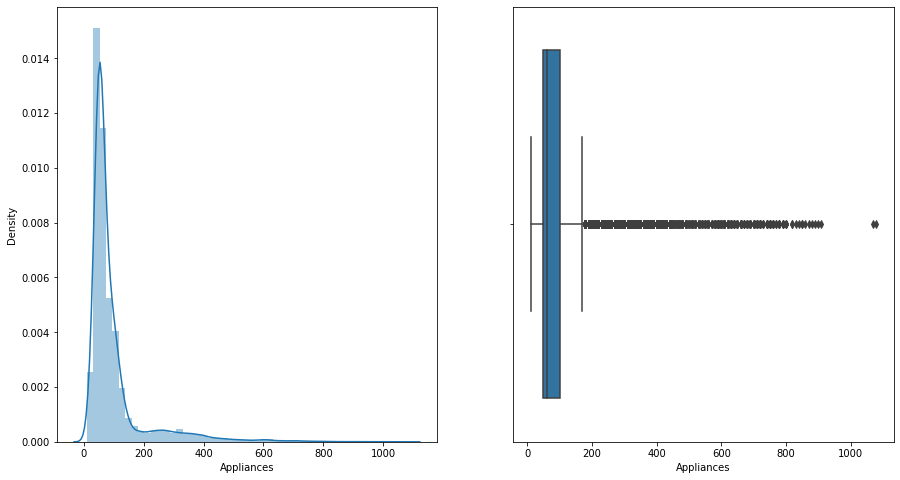

In [11]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
sns.distplot(df.Appliances,ax=ax[0])
sns.boxplot(df.Appliances, ax=ax[1])

dependent variable is right skewed and lot of outliers present inour data set

using transformation method on dependent variable

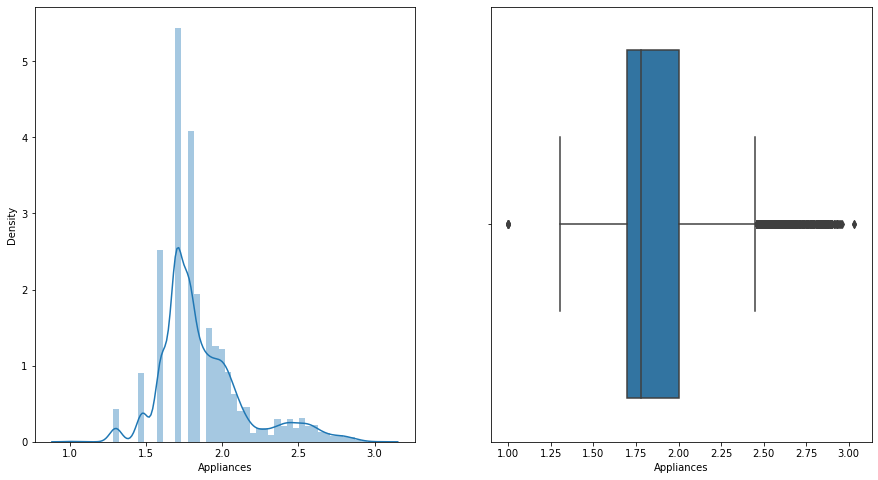

In [12]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
sns.distplot(np.log10(df.Appliances),ax=ax[0])
sns.boxplot(np.log10(df.Appliances), ax=ax[1])

 log10 transformation give almost normnal distribution after converting two normal distribution 

### ckecking distribution of all the features

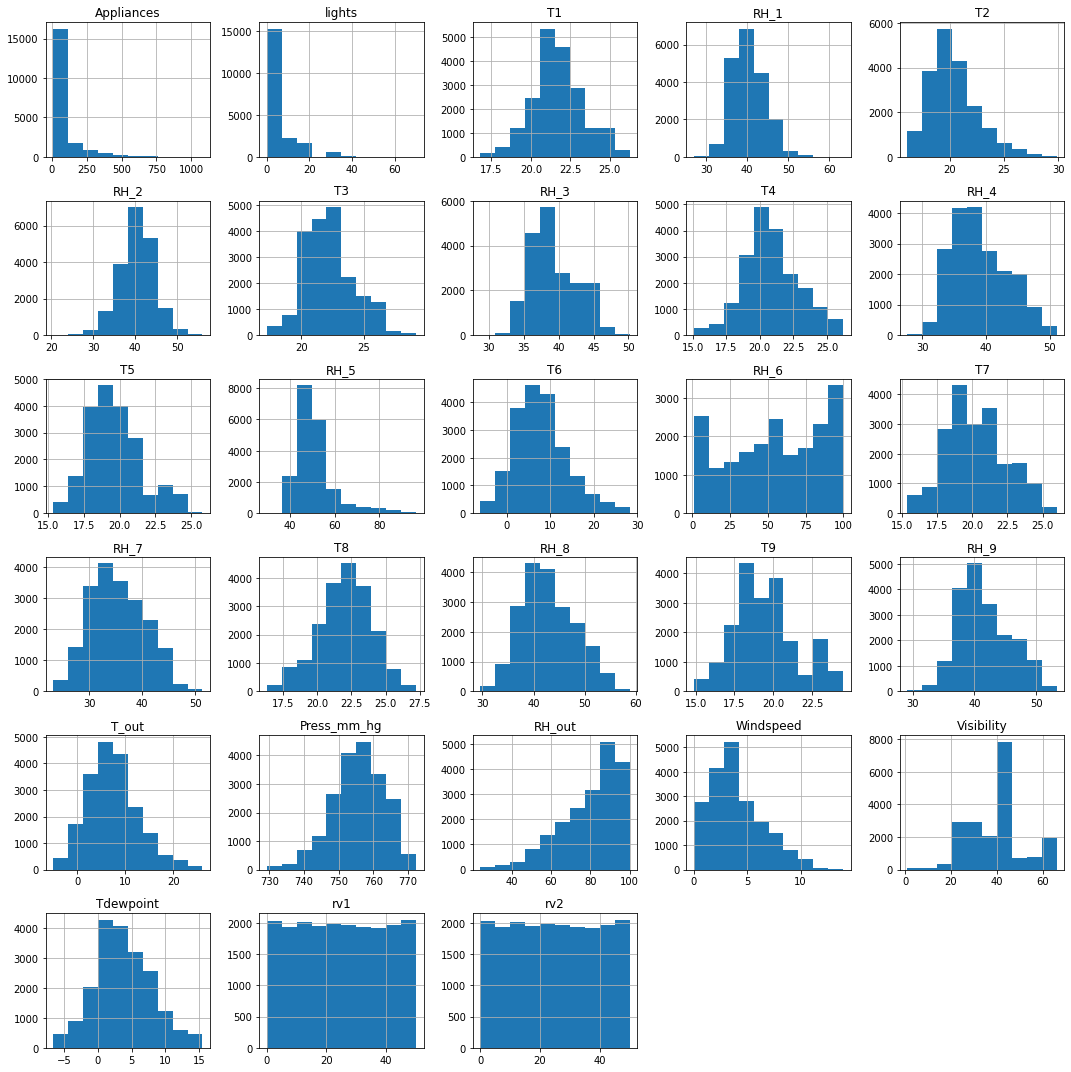

In [13]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

except lights, RH6 ,RH _out. windspeed, rv1, rv2column all the remaining columns are normal distributed data.

### checking relation between all the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fbe4410d0>,
      dtype=object)

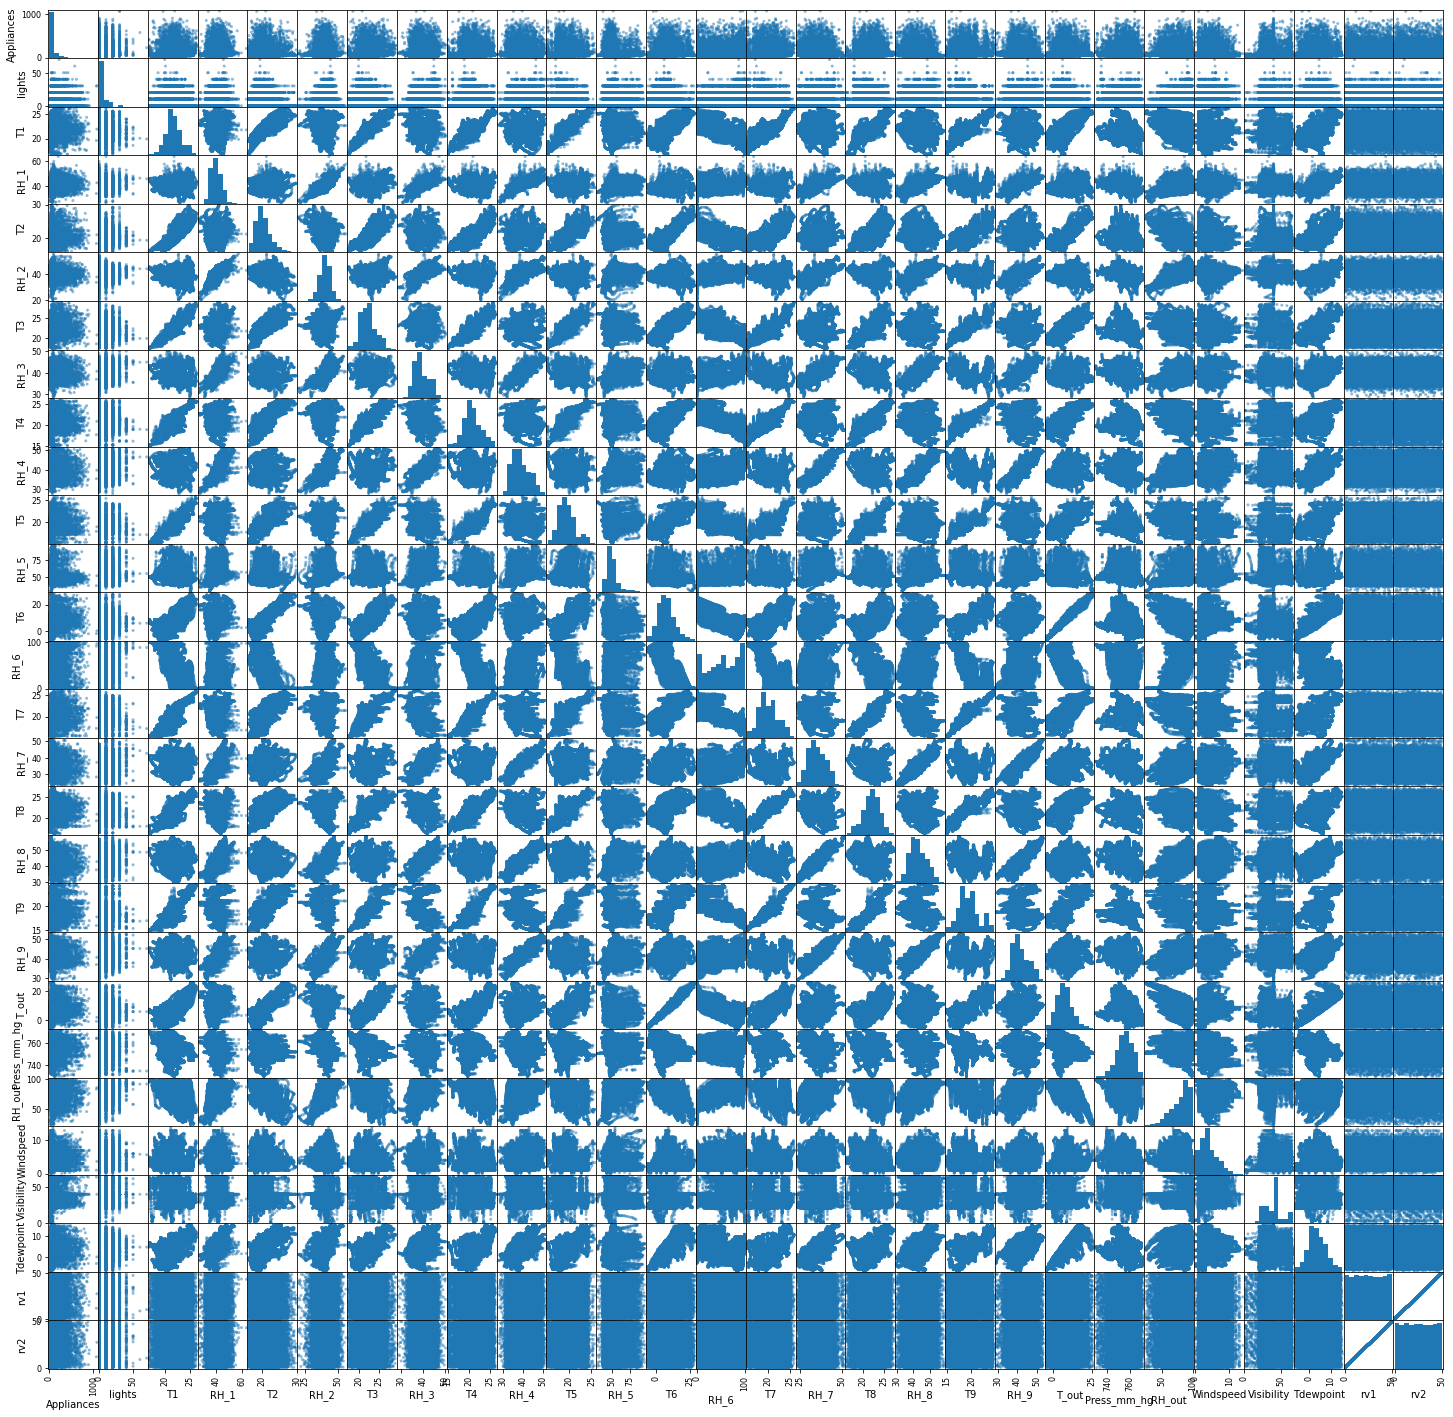

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25,25))

except lights feature all the remaining feature linearly corelate, we need to remove lights feature

### converting dates columns to numerical

In [15]:
#extracting date month time from date time columns
df["dates"]=pd.to_datetime(df['date'])
df['months']=df["dates"].dt.month
df['hour']=df["dates"].dt.hour

## energy consumption vs date 




In [16]:
date=df.groupby(df.months)["Appliances"].sum().sort_values(ascending=False)
date

months
3    432800
4    427200
2    421550
5    362950
1    283510
Name: Appliances, dtype: int64

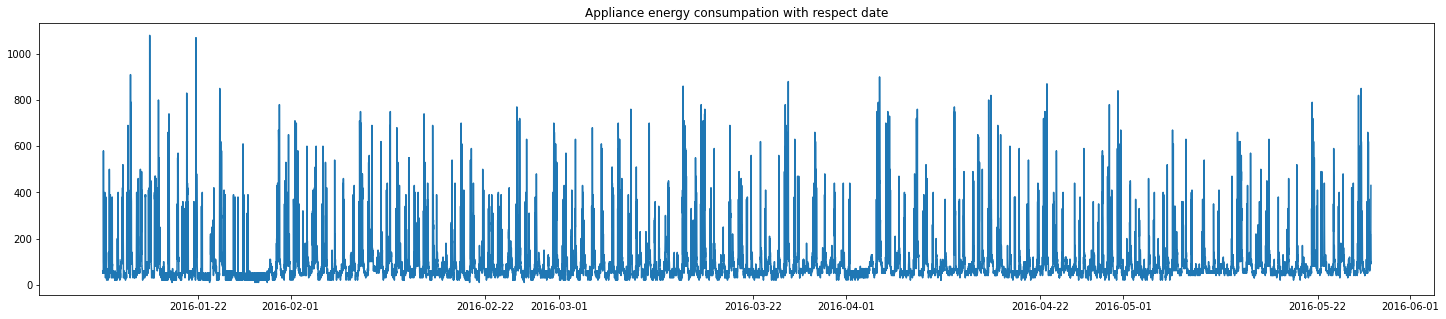

In [17]:
#ploting graph between appliance and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Appliances)
plt.title("Appliance energy consumpation with respect date")
plt.show()

in the march month we can clearly say that appliance consuming more energy, in jan month appliance consuming less energy

## energy consumption vs pressure

In [18]:
pressure=df.groupby(df.months)["Press_mm_hg"].sum().sort_values(ascending=False)
pressure

months
3    3374073.85
4    3259899.30
2    3146144.25
5    2912476.65
1    2217644.50
Name: Press_mm_hg, dtype: float64

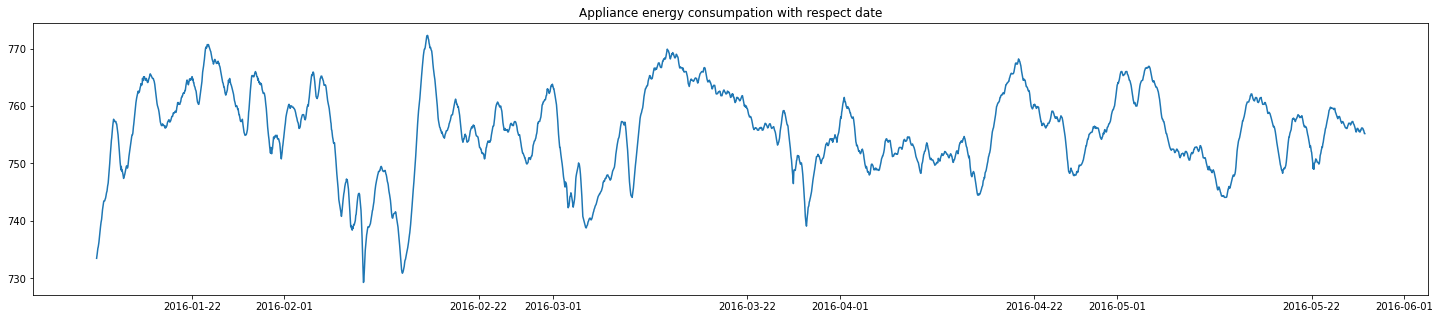

In [19]:
#ploting graph between pressure and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Press_mm_hg)
plt.title("Appliance energy consumpation with respect date")
plt.show()

march month having high pressure is recording and jan month having lesser pressure recording we can clearly say pressure is more impacting on enrgy consumption whenever the high pressure which leads to appliance consume more energy

## energy consumption vs windspeed

In [20]:
Windspeed=df.groupby(df.months)["Windspeed"].sum().sort_values(ascending=False)
Windspeed

months
2    20244.5
3    17824.0
4    15778.5
1    14012.5
5    11865.0
Name: Windspeed, dtype: float64

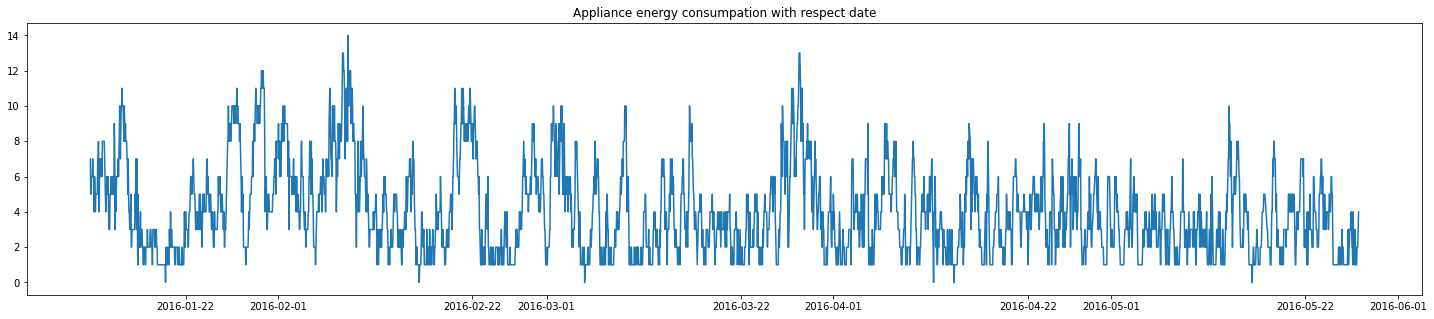

In [21]:
#ploting graph between windspeed and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Windspeed)
plt.title("Appliance energy consumpation with respect date")
plt.show()

in feb month we wind speed are high but energy consumption is not high on feb month so we can conclude windspeed is not much effective for our target variable

### Checking which day of week has more energy consumption

In [79]:
#extractingf week day 
df['week_days']=df["dates"].dt.dayofweek


In [80]:
Week=df.groupby(df.week_days)["Appliances"].sum().sort_values(ascending=False)
Week

week_days
0    309610
4    297650
5    290690
3    260450
6    259690
2    259000
1    250920
Name: Appliances, dtype: int64

Text(0.5, 1.0, 'energy usage in each days')

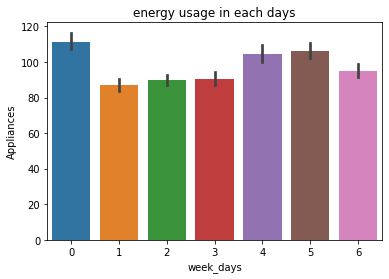

In [115]:
sns.barplot(df.week_days,df.Appliances)
plt.title("energy usage in each days")

0 - sunday , sunday has more energy consumption it means that people spend more time inside home

### Comparing target variable with all the Humidity columns

In [26]:
humidity_column=df[['RH_1', 'RH_2','RH_3','RH_4','RH_5', 'RH_6','RH_7','RH_8','RH_9']]

In [66]:
#ploting lineplot for all the humidity columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,humidity_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the Humidity inside house')
plt.show()

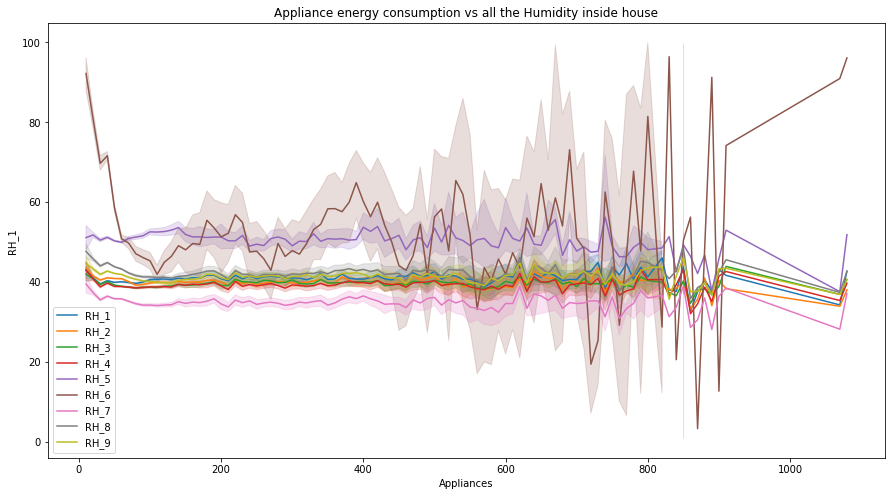

In [67]:
features=humidity_column.columns
line_plot(features)

RH_6 Humidity feature is outside humidity of house it has high variation in the values mostly becouse of outside pressure, temp 

### Comparing target variable with all the temp columns

In [50]:
temp_column=df[['T1', 'T2','T3','T4','T5', 'T6', 'T7',  'T8','T9', ]]

In [64]:
#ploting lineplot for all the temp columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,temp_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the temp inside house')
plt.show()

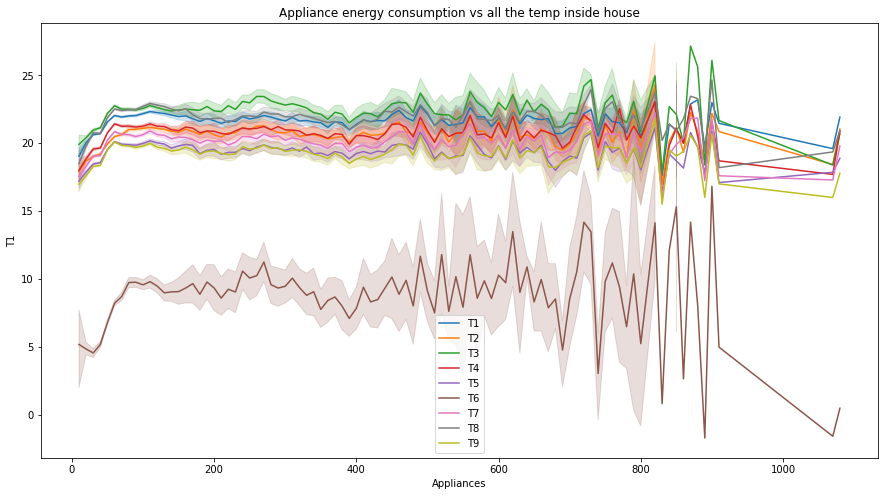

In [65]:
features=temp_column.columns
line_plot(features)

excpet t6 temp all the house inside temp are almost constant in each day but outside temp is having so much variation maybe becouse of pressure, wind spped variation

### Comparing target variable with features calculated by weather station

In [70]:
weather_station_column=df[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint' ]]

In [73]:
#ploting lineplot for all the weather station columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,weather_station_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the values detect through weather station')
plt.show()

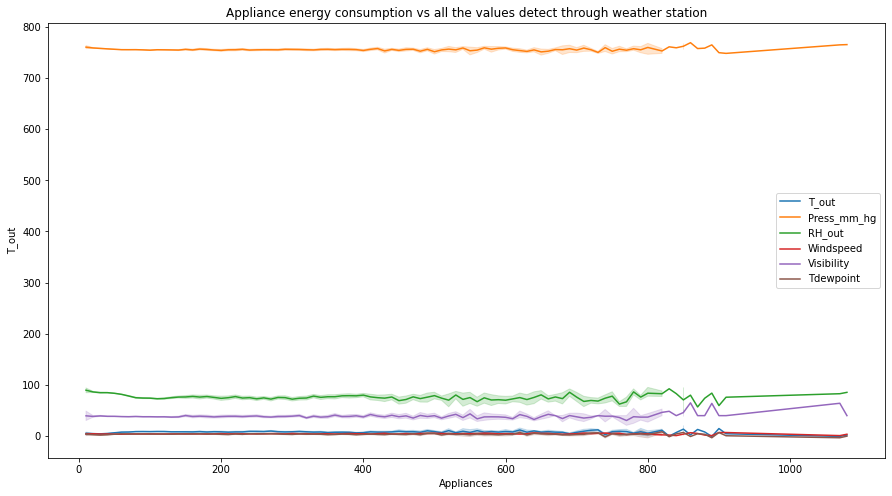

In [74]:
features=weather_station_column.columns
line_plot(features)

all the features having constant values during each day

# Feature selection

In [87]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dates,months,hour,week_days
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,17,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,17,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,17,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,1,17,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,17,0


In [102]:
#removing dates column
df.drop("dates",axis=1,inplace=True)

In [103]:
df.shape

(19735, 31)

In [113]:
#removing light column
df.drop("lights",axis=1,inplace=True)

### varience threshold removal
using this method we can able to all the columns that have constant values in feature

In [99]:
from sklearn.feature_selection import VarianceThreshold

In [114]:
#implemention variancethreshold
variance_threshold=VarianceThreshold(threshold=0)
variance_threshold.fit(df)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

here there is no column in our data set having constant values 

### chi2 method for feature selection

0